In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plays = pd.read_csv("plays.csv")
plays.head()

,playId,gameId,playSequence,quarter,possessionTeamId,nonpossessionTeamId,playType,playType2,playTypeDetailed,playNumberByTeam,...,scorePossession,scoreNonpossession,homeScorePre,visitingScorePre,homeScorePost,visitingScorePost,distanceToGoalPost,fieldGoalProbability,huddle,formation
0,30298,26909,1,1,2200,3200,kickoff,"kickoff, returned","kickoff, returned",1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,30299,26909,2,1,3200,2200,pass,"pass, complete","pass, complete",1,...,0,0,0,0,0,0,44.0,0.26,huddle,NaN
2,30300,26909,3,1,3200,2200,pass,"pass, complete","pass, complete",2,...,0,0,0,0,0,0,30.0,0.74,no huddle,shotgun
3,30301,26909,4,1,3200,2200,pass,"pass, incomplete","pass, incomplete",3,...,0,0,0,0,0,0,30.0,0.91,no huddle,shotgun
4,30302,26909,5,1,3200,2200,pass,"pass, complete","pass, complete",4,...,0,0,0,0,0,0,28.0,0.91,no huddle,NaN


# Research Questions
How far does the average kickoff need to go to result in a touchback?
Does pressure influence the accuracy of the kicker?

In [16]:
plays.drop(plays[plays["playType"] != "field goal"].index, inplace = True)
plays.head()

,playId,gameId,playSequence,quarter,possessionTeamId,nonpossessionTeamId,playType,Made,playTypeDetailed,playNumberByTeam,...,scorePossession,scoreNonpossession,homeScorePre,visitingScorePre,homeScorePost,visitingScorePost,distanceToGoalPost,fieldGoalProbability,huddle,formation
10,30308,26909,11,1,3200,2200,field goal,1,"field goal, good",10,...,3,0,0,0,3,0,NaN,0.99,NaN,NaN
37,30335,26909,38,2,2200,3200,field goal,1,"field goal, good",19,...,3,0,3,0,3,3,NaN,0.99,NaN,NaN
79,30377,26909,80,2,3200,2200,field goal,1,"field goal, good",39,...,3,0,10,17,13,17,NaN,0.96,NaN,NaN
162,30460,26909,163,4,2200,3200,field goal,0,"field goal, no good (wide right)",90,...,0,0,27,24,27,24,NaN,0.92,NaN,NaN
218,5543,26910,55,2,610,2250,field goal,0,"field goal, no good (wide left)",33,...,0,0,7,0,7,0,NaN,0.97,NaN,NaN


In [18]:
kicks = plays.copy()
kicks["playType2"] = plays["playType2"].str.replace("field goal, no good", "0")
kicks["playType2"] = plays["playType2"].str.replace("field goal, good", "1")

kicks.head()

KeyError: 'playType2'

In [12]:
kicks.rename(columns = {"playType2":"Made"}, inplace=True)
kicks.head()

,playId,gameId,playSequence,quarter,possessionTeamId,nonpossessionTeamId,playType,Made,playTypeDetailed,playNumberByTeam,...,scorePossession,scoreNonpossession,homeScorePre,visitingScorePre,homeScorePost,visitingScorePost,distanceToGoalPost,fieldGoalProbability,huddle,formation
0,30298,26909,1,1,2200,3200,kickoff,"kickoff, returned","kickoff, returned",1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,30299,26909,2,1,3200,2200,pass,"pass, complete","pass, complete",1,...,0,0,0,0,0,0,44.0,0.26,huddle,NaN
2,30300,26909,3,1,3200,2200,pass,"pass, complete","pass, complete",2,...,0,0,0,0,0,0,30.0,0.74,no huddle,shotgun
3,30301,26909,4,1,3200,2200,pass,"pass, incomplete","pass, incomplete",3,...,0,0,0,0,0,0,30.0,0.91,no huddle,shotgun
4,30302,26909,5,1,3200,2200,pass,"pass, complete","pass, complete",4,...,0,0,0,0,0,0,28.0,0.91,no huddle,NaN


In [5]:
kicks.filter(["playId", "gameId", "quarter", "possessionTeamId", "nonpossessionTeamId", "playType", "Made", "scorePossession", "homeScorePre", "visitingScorePre", "distanceToGoalPost", "fieldGoalProbability"])

,playId,gameId,quarter,possessionTeamId,nonpossessionTeamId,playType,Made,scorePossession,homeScorePre,visitingScorePre,distanceToGoalPost,fieldGoalProbability
10,30308,26909,1,3200,2200,field goal,1,3,0,0,NaN,0.99
37,30335,26909,2,2200,3200,field goal,1,3,3,0,NaN,0.99
79,30377,26909,2,3200,2200,field goal,1,3,10,17,NaN,0.96
162,30460,26909,4,2200,3200,field goal,0,0,27,24,NaN,0.92
218,5543,26910,2,610,2250,field goal,0,0,7,0,NaN,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...
870135,15088172,58165,2,4500,1800,field goal,1,3,17,0,NaN,0.99
870213,15088250,58165,4,4500,1800,field goal,1,3,34,20,NaN,0.97
870238,15088476,58167,1,4500,2310,field goal,1,3,0,0,NaN,0.98
870270,15088508,58167,2,2310,4500,field goal,1,3,7,3,NaN,0.99


In [41]:
kicks2 = pd.read_csv("kicks.csv")
kicks2.head()

kicks2.isnull().sum()

kickId               0
playId               0
teamId               0
playerId             0
kickPosition         0
kickType             0
kickOutcome        100
kickInside20         0
kickOnside           0
kickOwnRecovery      0
kickLength         302
kickReturnYds        0
kickNetYds         308
kickReturnTd         0
kickNull             0
dtype: int64

In [40]:
fieldGoals = kicks2[(kicks2["kickType"] == "xp") | (kicks2["kickType"] == "field goal")].copy()
fieldGoals.drop(["kickOnside", "kickOwnRecovery", "kickReturnYds", "kickNetYds", "kickReturnTd", "kickPosition"], axis=1, inplace=True)
fieldGoals.head()

,kickId,playId,teamId,playerId,kickType,kickOutcome,kickInside20,kickLength,kickNull
4,300005,31,3200,19960452,xp,good,0,19.0,0
6,300007,43,3200,19960452,xp,good,0,19.0,0
9,300010,57,3800,20000169,field goal,good,0,51.0,0
11,300012,64,3800,20000169,field goal,good,0,52.0,0
14,300015,82,3800,20000169,field goal,missed,0,58.0,0


In [19]:
kickoffs = kicks2[kicks2["kickType"] == "kickoff"]
kickoffs.head()

,kickId,playId,teamId,playerId,kickPosition,kickType,kickOutcome,kickInside20,kickOnside,kickOwnRecovery,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickNull
0,300001,1,3200,19960452,K,kickoff,returned,1,0,0,72.0,17,55.0,0,0
5,300006,32,3200,19960452,K,kickoff,returned,1,0,0,73.0,18,55.0,0,0
7,300008,44,3200,19960452,K,kickoff,returned,0,0,0,70.0,28,42.0,0,0
10,300011,58,3800,20000169,K,kickoff,returned,0,0,0,70.0,23,47.0,0,0
12,300013,65,3800,20000169,K,kickoff,touchback,0,0,0,70.0,0,50.0,0,0


In [26]:
touchbacks = kickoffs[kickoffs["kickOutcome"] == "touchback"]
returns = kickoffs[kickoffs["kickOutcome"] == "returned"]

touchbackAverage = touchbacks["kickLength"].mean()
returnAverage = returns["kickLength"].mean()
display(touchbackAverage)
display(returnAverage)

70.50524629997791

64.18933472829097

array([[<AxesSubplot:title={'center':'kickLength'}>]], dtype=object)

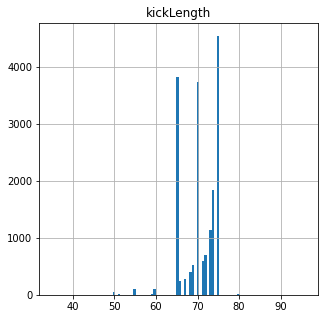

In [33]:
touchbacks.hist(column="kickLength", bins=100, figsize=(5,5))

array([[<AxesSubplot:title={'center':'kickLength'}>]], dtype=object)

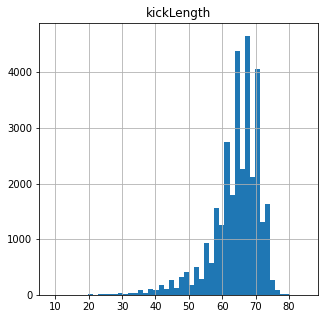

In [35]:
returns.hist(column="kickLength", bins=50, figsize=(5,5))

In [38]:
returns = returns[returns["kickOnside"] == 0]
returns["kickLength"].mean()

64.18933472829097